### Supervised Learning Analysis: 500 vs 1000 training reads


#### 500 vs 1000 training reads 
* This notebook compares testing accuracy across the 30 rounds of training with one sample of 1000 reads in training and one with 500 reads in training. 


In [1]:
from multiple_model_accuracy import MultipleModelAccuracy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os


mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
mma = MultipleModelAccuracy(reference, positions, mods_csv)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
from py3helpers.utils import list_dir
reads_1000 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
reads_500 = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/testing_accuracy_csvs"
reads_1000_csvs = [mma.preprocess_accuracy_csv(x) for x in list_dir(reads_1000, "csv")]
reads_500_csvs = [mma.preprocess_accuracy_csv(x) for x in list_dir(reads_500, "csv")]



<IPython.core.display.Javascript object>


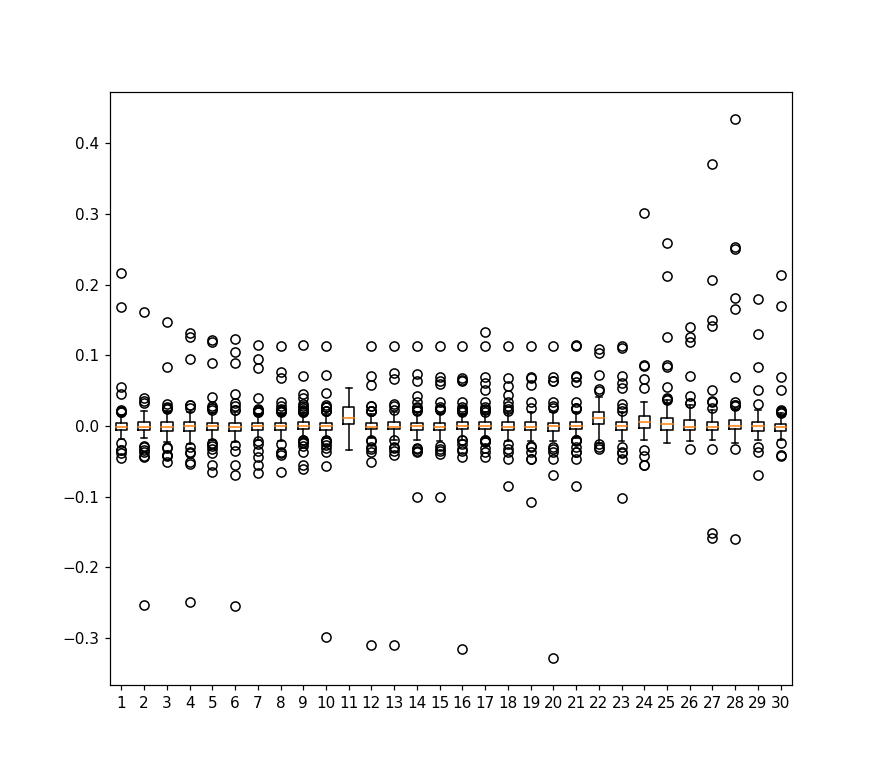

In [3]:
%matplotlib notebook
# 1000 - 500
deltas = [reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy  for i in range(len(reads_500_csvs))]
fig = plt.figure(figsize =(8, 7)) 
  
# Creating plot 
plt.boxplot(deltas) 
  
# show plot 
plt.show() 


In [4]:
i = 1
testing_diff = 0.05
reads_1000_csvs[i]["testing_diff"] =  reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy 
reads_1000_csvs[i][np.abs(reads_1000_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
24,RDN18-1,1190,0.9420,0.8912,4.0,100,0.1615
86,RDN25-1,2416,0.6022,0.9537,1.0,100,-0.2537


In [5]:
i = 29
testing_diff = 0.05
reads_1000_csvs[i]["testing_diff"] =  reads_1000_csvs[i].accuracy - reads_500_csvs[i].accuracy 
reads_1000_csvs[i][np.abs(reads_1000_csvs[i]["testing_diff"]) > testing_diff][["contig", "reference_index", "accuracy", "recall", "delta", "percent", "testing_diff"]]       

,contig,reference_index,accuracy,recall,delta,percent,testing_diff
24,RDN18-1,1190,0.9431,0.8932,4.0,100,0.1698
69,RDN25-1,2219,0.8266,0.7505,23.0,93,0.0696
71,RDN25-1,2257,0.8596,0.9853,2.0,95,0.0515
86,RDN25-1,2416,0.8516,0.9537,1.0,100,0.2140


In [6]:
key="accuracy"
high_percent=100
low_percent=0
low_delta=0
high_delta=np.inf
max_delta=False
aot=True
avd=True
model_n = 30


<IPython.core.display.Javascript object>


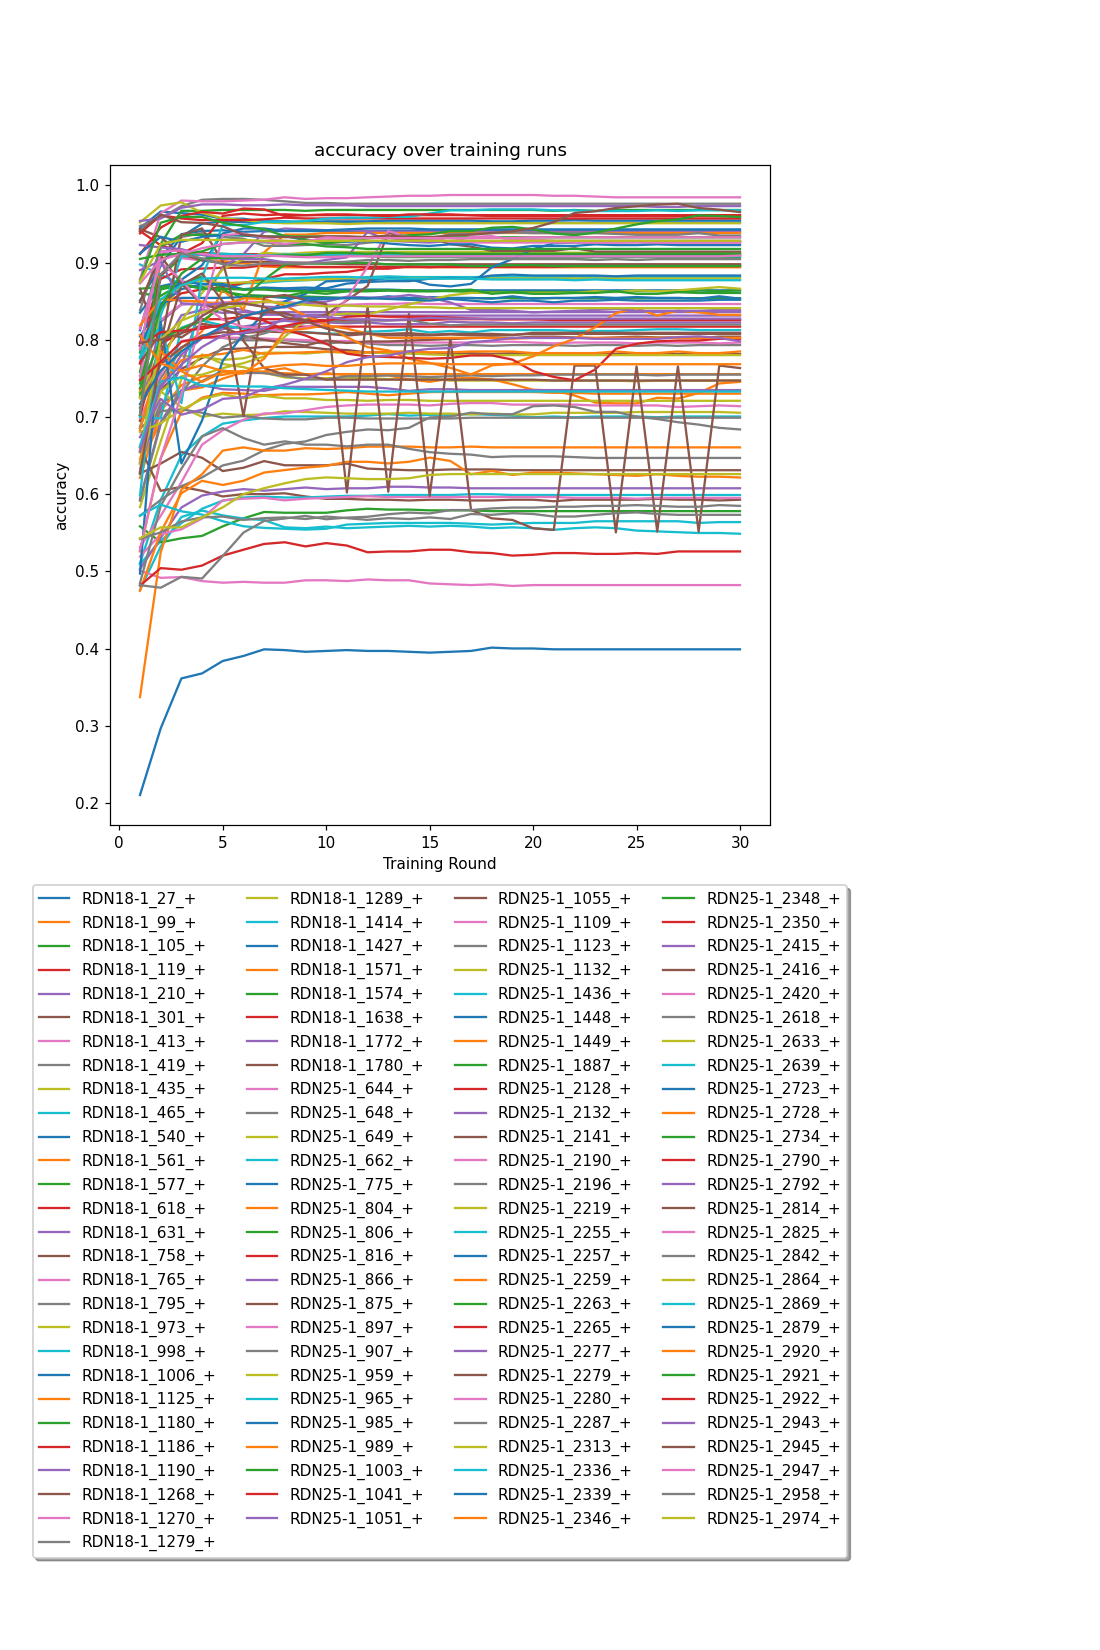

<IPython.core.display.Javascript object>


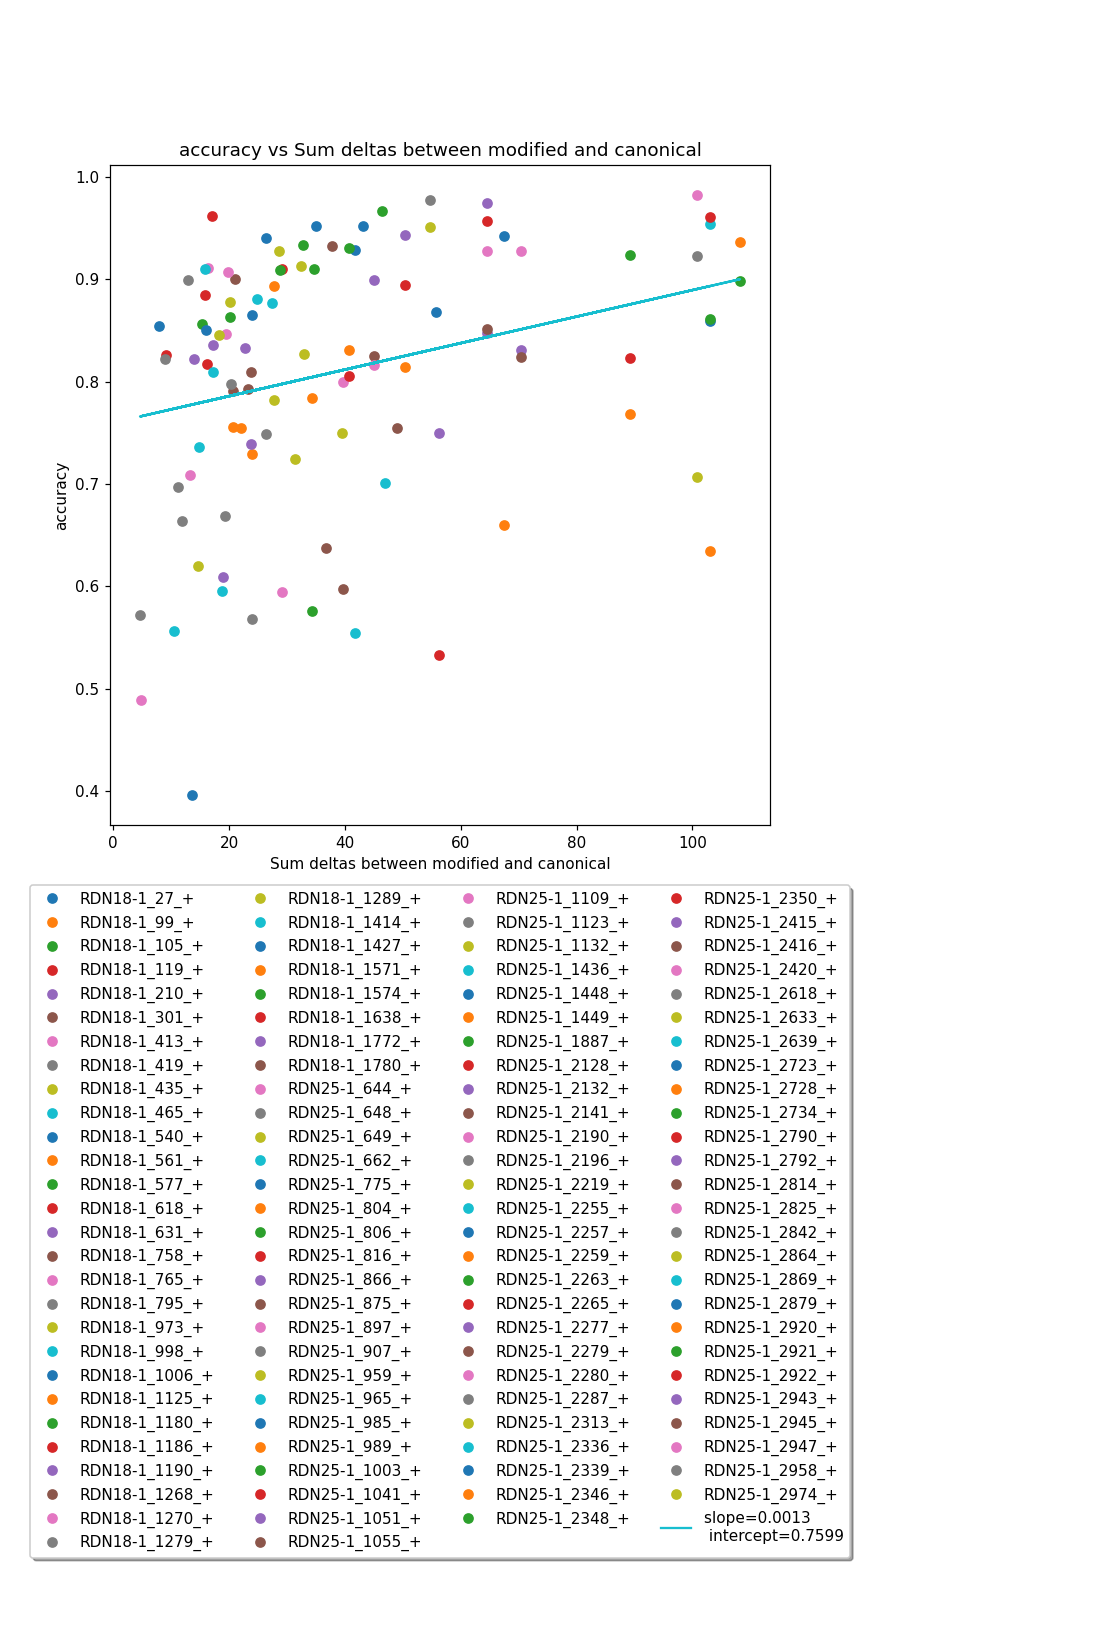

In [7]:
%matplotlib notebook
experiment_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_1000_test_500_prob_0.5_em_iterations_30/"

dir_path = os.path.join(experiment_path, "testing_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, 
                                                         model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  


<IPython.core.display.Javascript object>


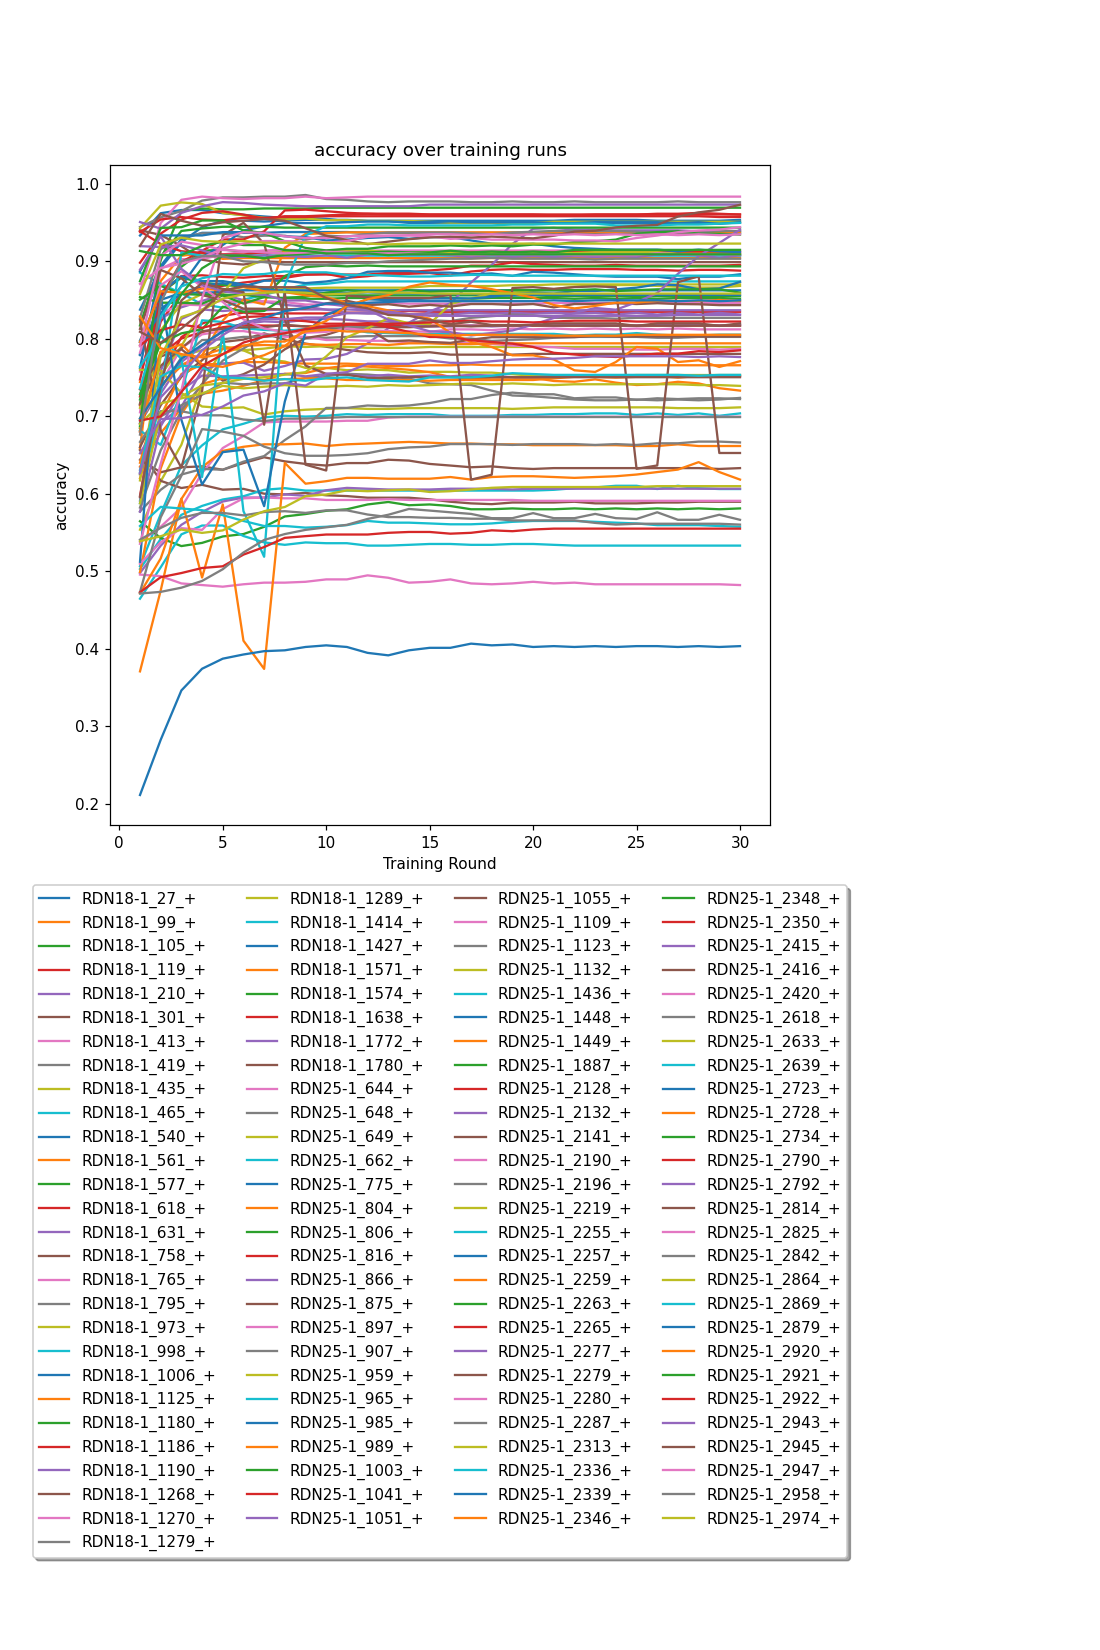

<IPython.core.display.Javascript object>


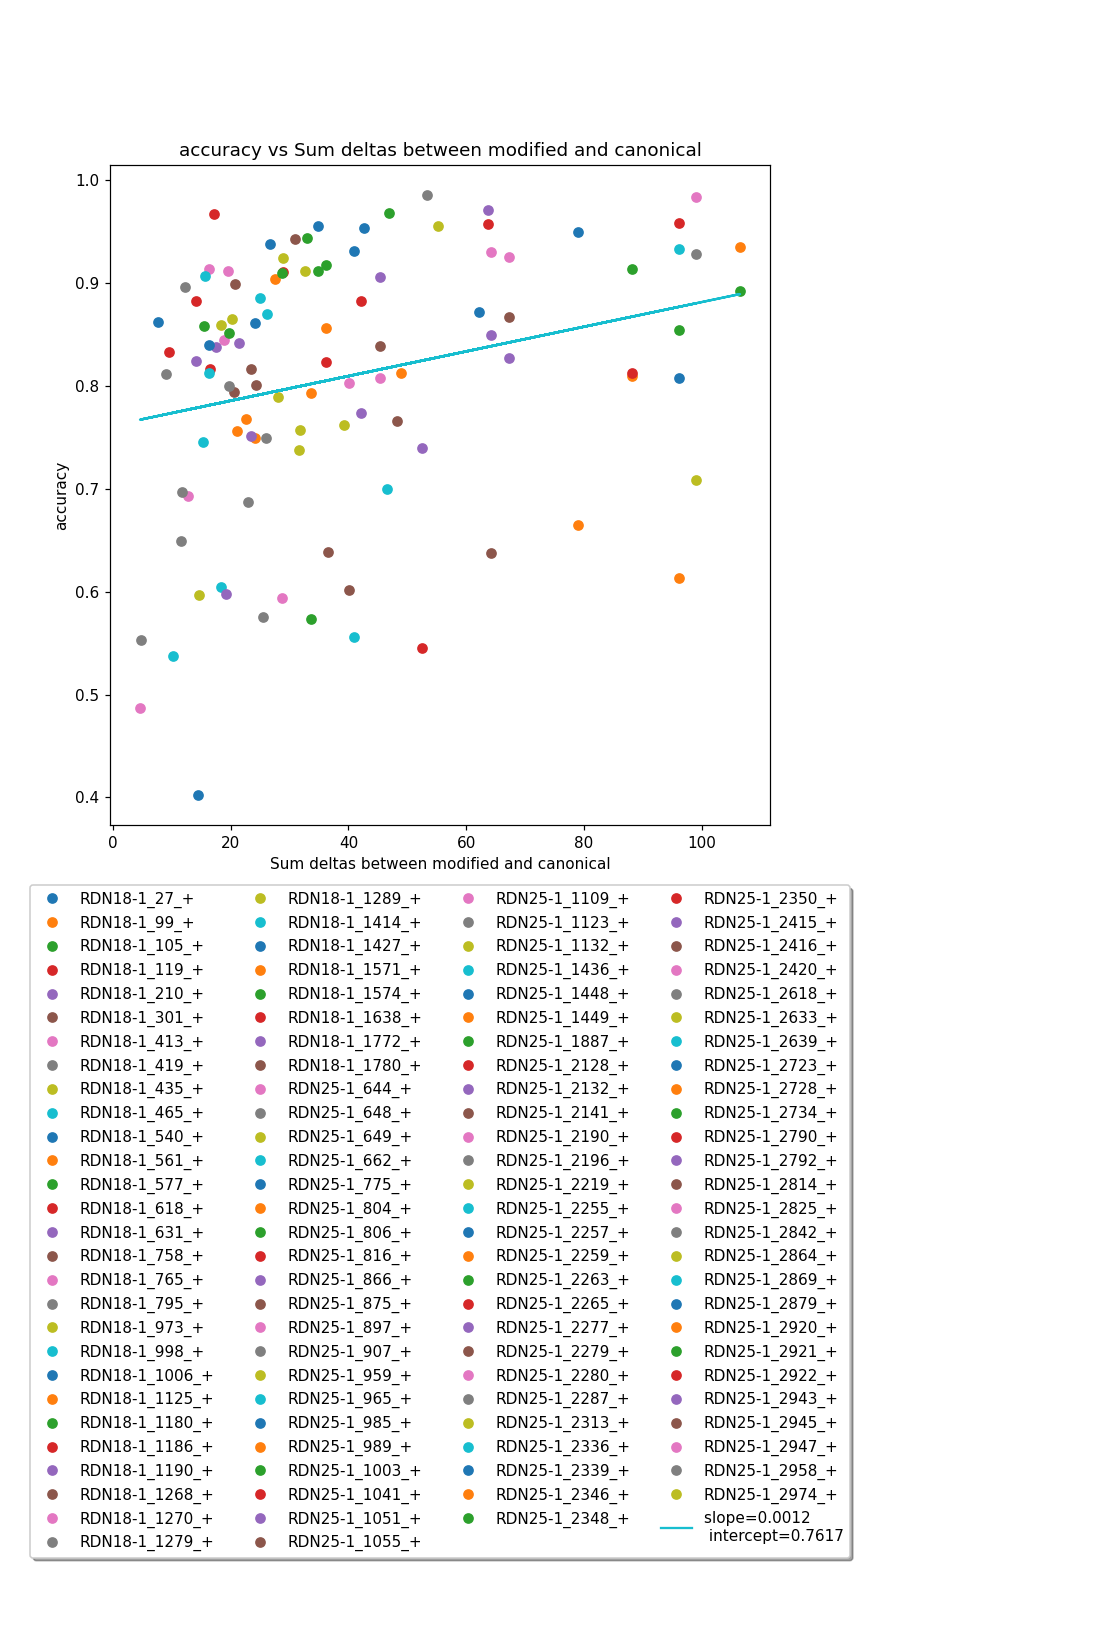

In [8]:
experiment_path = "/Volumes/gdrive/rrna_kube_testing/supervised/probability_sweep/train_500_test_500_prob_0.5_em_iterations_30/"

dir_path = os.path.join(experiment_path, "testing_accuracy_csvs")
model_dir = os.path.join(experiment_path, "training_models")
p, k = mma.plot_accuracy_vs_delta_and_accuracy_over_time(dir_path, 
                                                         model_dir, 
                                                         model_n, 
                                                         high_percent=high_percent, 
                                                         low_percent=low_percent, 
                                                         low_delta=low_delta, 
                                                         high_delta=high_delta, 
                                                         key=key, 
                                                         max_delta=max_delta,
                                                         aot=aot,
                                                         avd=avd)  
